# Introduction to matplotlib and the pyplot API

## matplotlib 

matplotlib is a 2D Python plotting library that is meant to create _publication quality figures_ in both hardcopy and interactive environments. It is the cornerstone of data visualization in Python and as a result is a fiscally sponsored project of the [NumFocus](http://www.numfocus.org/) organization. matplotlib is: 

- Open Source and Free 
- Platform Agnostic
- A General Visual Framework 
- Optimized for Scientific Visualization 

The primary way to interact with matplotlib is through the `pyplot` API - a _simple_ interface to the drawing components provided by matplotlib, as shown in the component architecture below:

![The matplotlib Component Model](figures/matplotlib_components.png)

<p><center><small>The above figure is from McGreggor, Duncan M. _Mastering matplotlib_. Packt Publishing Ltd, 2015.</small></center></p>

In this notebook we'll explore using matplotlib to create and customize our own plots. 

First things first:

In [8]:
%matplotlib inline 

### What is `%matplotlib inline`? 

`%matplotlib inline` is a Jupyter notebook [magic function](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained). It simply renders the figure created by the cell as a static image. This is useful for notebooks who you expect to "run all" cells routinely. Note also that this affects both Pandas and Seaborn rendering as well. 

An alternative is `%matplotlib notebook` which allows interactive figures (if your environment allows it).

The best thing for the magic function to work is to have it be the first thing in your Jupyter notebook.

We'll also import our packages into the namespace using the standard short names:

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

The basic interaction of matplotlib is to pass data to functions in the `plt` module:

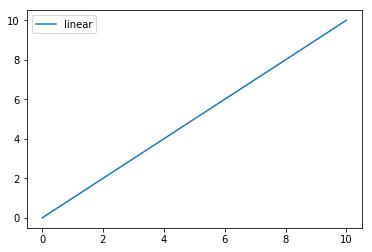

In [9]:
# Create the X data points as a numpy array 
x = np.linspace(0, 10, 100)

# Compose a plot
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Now it's your turn! 

Try out some of these commands to manipulate the plot:

    figtext() 		Add text to figure
    title()           Add title to figure  
    xlim()		    Get or set x limits of current axes.
    ylim()		    Get or set y limits of current axes
    subplot() 	    Return subplot axes (specify position)    
    savefig() 		Save the current figure

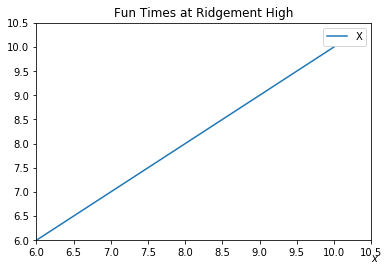

In [11]:
# # Create the X data points as a numpy array 
# x = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)

# # Compose a plot
# plt.plot(x, x, label='linear')
plt.plot(x, x, label='linear')
# # Change the x-axis range
# plt.xlim()
plt.xlim(6)
# # Change the y-axis range
# plt.ylim()
plt.ylim(6)
# # Add a title
# plt.title()
plt.title("Fun Times at Ridgement High")
# # Add text
# plt.figtext()
plt.figtext(0.9, 0.05, '$x$')
# # Add a legend
# plt.legend()
plt.legend("X")
# # Add a subplot
# plt.subplot()

# # Save the figure
# plt.savefig()
plt.savefig('fun')
# # Display the plot
# plt.show()
plt.show()

`matplotlib` comes with default functions that allow customizing nearly every part of the figure. This is both a benefit and a barrier: you have fine grained control at the cost of complexity. Generally speaking the matplotlib defaults are good, considering visibility for colorblind folks, printing in black and white, etc. In the [2.0 release](https://matplotlib.org/users/whats_new.html), the styles look better than ever.


### A plot is like a canvas

It's useful to think of a `matplotlib` plot as a canvas; as we add elements to the plot, it's as if we are painting additional layers onto the plot. In the below example, we create a set of points and then compute two different quadratic functions with our data. Then we "paint" the first function onto the plot, followed by the second function.

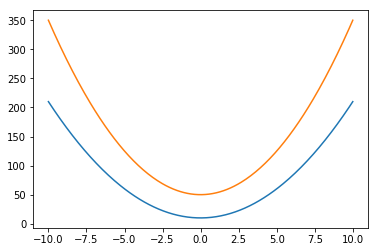

In [12]:
# Create the X data points as a numpy array 
X = np.linspace(-10, 10, 255)

# Compute two quadratic functions 
Y1 = 2*X ** 2 + 10
Y2 = 3*X ** 2 + 50 

plt.plot(X, Y1)
plt.plot(X, Y2)

plt.show()

The `plt.plot` function does a lot of work on our behalf: it initializes the figure, creates a subplot with axes, then computes and draws two `Line2D` objects. 

Let's now look at all the steps it would take to draw this from scratch, which also demonstrate the configuration control you have over the figure.

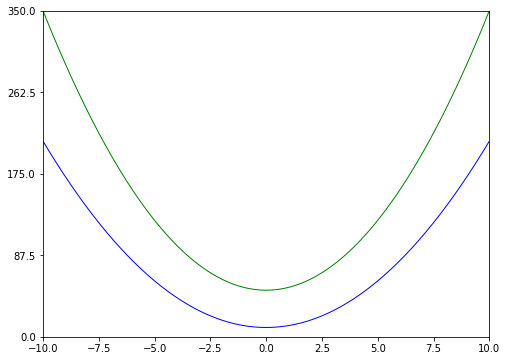

In [13]:
# Create a new figure of size 8x6 points, using 72 dots per inch 
plt.figure(figsize=(8,6), dpi=72)

# Create a new subplot from a 1x1 grid 
plt.subplot(111)

# Create the data to plot 
X = np.linspace(-10, 10, 255)
Y1 = 2*X ** 2 + 10
Y2 = 3*X ** 2 + 50 

# Plot the first quadratic using a blue color with a continuous line of 1px
plt.plot(X, Y1, color='blue', linewidth=1.0, linestyle='-')

# Plot the second quadratic using a green color with a continuous line of 1px
plt.plot(X, Y2, color='green', linewidth=1.0, linestyle='-')

# Set the X limits 
plt.xlim(-10, 10)

# Set the X ticks 
plt.xticks(np.linspace(-10, 10, 9, endpoint=True))

# Set the Y limits 
plt.ylim(0, 350)

# Set the Y ticks 
plt.yticks(np.linspace(0, 350, 5, endpoint=True))

# Show the figure
plt.show()

Yikes! But this is why the pyplot API is so convenient - the goal of `pyplot` has always been to give as simple plotting functions as possible, so that figures can be drawn without much effort. In practice, it is easy to get simple graphs plotted, but much tougher to configure them as needed. 

Key points:

- There is a global figure that is drawn on 
- The objects that are returned from these functions can be directly manipulated 
- Outside of a notebook nothing will be rendered until `plt.show` 

_Note: to get the same functionality in a Python script you'll have to tell `pyplot` to render the figure, either to an interactive backend like Tk or to an image, either raster or SVG:_

    plt.show() 
    plt.savefig('myfig.pdf') 

### Colors and style 

In [14]:
# Create the data to plot 
# This data will be referenced for the next plots below
# For Jupyter notebooks, pay attention to variables! 

X = np.linspace(-10, 10, 255)
Y1 = 2*X ** 2 + 10
Y2 = 3*X ** 2 + 50 

We can directly pass colors and style to each of the drawing functions in the `pyplot` API. The arguments for color and linestyle can either be full words, e.g. "blue" or "dashed" or they can be shortcodes, for example 'b' or '--'. 

The color cycle in matplotlib determines which colors will be used for each new element drawn to the graph. The cycle is keyed to the short codes: 'bgrmyck' which stands for:

    blue green red maroon yellow cyan key 
    
A quick visualization of these colors is as follows:

[]

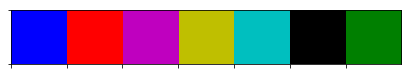

In [15]:
from matplotlib.colors import ListedColormap

colors = 'brmyckg'
fig, ax = plt.subplots(1, 1, figsize=(7, 1))
ax.imshow(np.arange(7).reshape(1,7), cmap=ListedColormap(list(colors)), interpolation="nearest", aspect="auto")
ax.set_xticks(np.arange(7) - .5)
ax.set_yticks([-0.5,0.5])
ax.set_xticklabels([])
ax.set_yticklabels([])

The default style is currently 'ggplot' -- though this is going to be updated soon. You can set the style of the graphs, or even provide your own CSS style sheet with the `plt.style.use` function: 

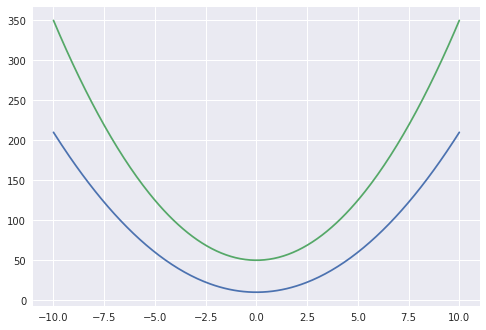

In [16]:
# Note that I'm going to use temporary styling so I don't mess up the notebook! 
with plt.style.context(('seaborn')):
    plt.plot(X, Y1)
    plt.plot(X, Y2)

In [17]:
# To see the available styles:
for style in plt.style.available: print("- {}".format(style))

- seaborn-dark
- seaborn-darkgrid
- seaborn-ticks
- fivethirtyeight
- seaborn-whitegrid
- classic
- _classic_test
- fast
- seaborn-talk
- seaborn-dark-palette
- seaborn-bright
- seaborn-pastel
- grayscale
- seaborn-notebook
- ggplot
- seaborn-colorblind
- seaborn-muted
- seaborn
- Solarize_Light2
- seaborn-paper
- bmh
- tableau-colorblind10
- seaborn-white
- dark_background
- seaborn-poster
- seaborn-deep


Note also that styles can be composed together by passing a list. Styles farther to the right will override styles to the left. 

Line styles can be set using the following shortcodes (note that marker styles for scatter plots can also be set using filled and point shortcodes):

![Line Styles](figures/linestyles.png)

So back to our original graphs we can convert the figure to have different colors and styles:

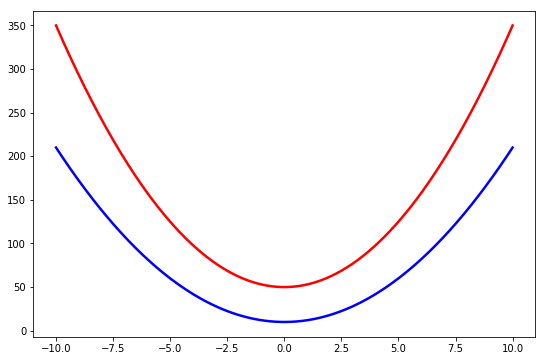

In [18]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-")

We can also change the x and y limits to put some space into out graph:

(-11.0, 385.00000000000006)

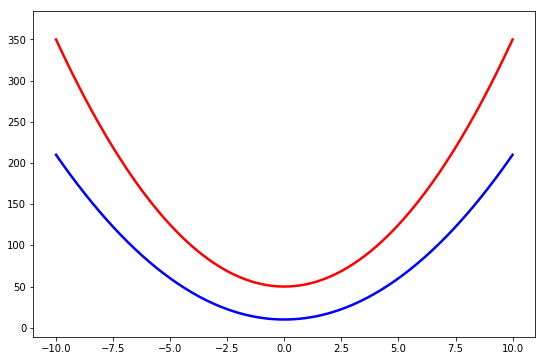

In [20]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(Y1.min()*-1.1, Y2.max()*1.1)

We can add a legend and a title:

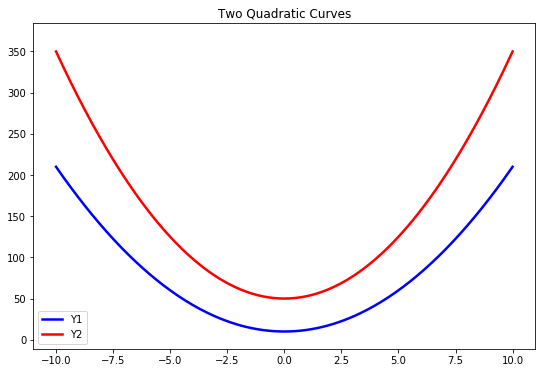

In [21]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-", label="Y1")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-", label="Y2")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(Y1.min()*-1.1, Y2.max()*1.1)

plt.title("Two Quadratic Curves")
plt.legend(loc='best')

And annotate some points on our graph:

Text(10, 50, '$3x^2+50=77$')

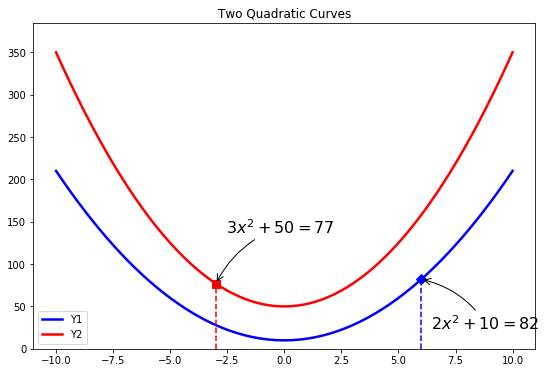

In [22]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-", label="Y1")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-", label="Y2")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(0, Y2.max()*1.1)

plt.title("Two Quadratic Curves")
plt.legend(loc='best')

# Annotate the blue line 
x = 6 
y = 2*x ** 2 + 10
plt.plot([x,x], [0, y], color='blue', linewidth=1.5, linestyle='--')
plt.scatter([x,], [y,], color='blue', s=50, marker='D')

plt.annotate(
    r'$2x^2+10={}$'.format(y), xy=(x,y), xycoords='data', xytext=(10,-50), 
    fontsize=16, textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
)

# Annotate the red line
x = -3
y = 3*x ** 2 + 50
plt.plot([x,x], [0, y], color='red', linewidth=1.5, linestyle='--')
plt.scatter([x,], [y,], color='red', s=50, marker='s')

plt.annotate(
    r'$3x^2+50={}$'.format(y), xy=(x,y), xycoords='data', xytext=(10,50), 
    fontsize=16, textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
)

### Figures, Subplots, and Axes 

The figure is the GUI window that displays the entirety of the drawing. Figures are numbered starting from 1, and each new plot has its own figure. Generally speaking though, you're only working on one global figure at a time. Figures have several properties that can be configured:

- **num**: the number of the figure. 
- **figsize**: the size of the figure in inches (width, height)
- **dpi**: resolution in dots per inch
- **facecolor**: the color of the drawing background 
- **edgecolor**: the color of the edge around the drawing background
- **frameon**: draw the figure frame or not 

Subplots allow you to arrange plots in a rectangular grid. They are specified by the rows and columns as well as the number of the plot (e.g. it's id). 

Here's how to add a subplot:

    fig = plt.figure()
    ax = fig.add_subplot(111)

The 111 above actually means 1,1,1 - in the above example we're passing three different arguments to add_subplot(). The three arguments designate the number of rows (1), the number of columns (1) and the plot number (1) of a single subplot. You can also add multiple subplots.

The [gridspec](http://matplotlib.sourceforge.net/users/gridspec.html) command gives a much more controlled alternative. 

![horizontal](figures/subplot-horizontal.png)

![vertical](figures/subplot-vertical.png)

![grid](figures/subplot-grid.png)

Axes are very similar to subplots but allow placement of plots at any location in the figure. This allows more fine grained plot within a plot control, but also the addition of complex images, for example colorbars for heatmaps. Because axes are the primary drawing space, they can also be worked on directly, usually with the `set_[]` style command. 

![axes](figures/axes.png)

![axes](figures/axes-2.png)



### Colormaps

See also: [Matplotlib colormaps](http://matplotlib.org/users/colormaps.html)

Text(0.5, 1.0, 'Fancy!')

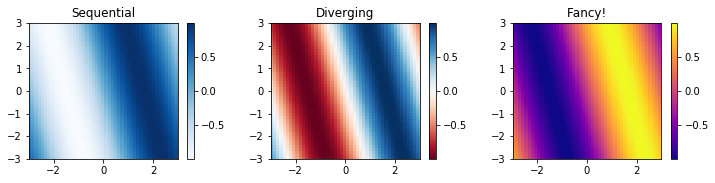

In [24]:
# Make up some fake data
x = np.linspace(-np.pi, np.pi, 50) 
y = np.linspace(-np.pi, np.pi, 50)
X,Y = np.meshgrid(x,y)
Z = np.sin(X + Y/4)

fig = plt.figure(figsize = (12,2.5))
fig.subplots_adjust(wspace=0.3)

# Blues
plt.subplot(1,3,1)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.axis([-3, 3, -3, 3])
plt.title('Sequential')

# Red-Blue
plt.subplot(1,3,2)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu'))
plt.colorbar()
plt.axis([-3, 3, -3, 3])
plt.title('Diverging')

# Red-Blue
plt.subplot(1,3,3)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('plasma'))
plt.colorbar()
plt.axis([-3, 3, -3, 3])
plt.title('Fancy!')

### Anatomy of a `matplotlib` plot

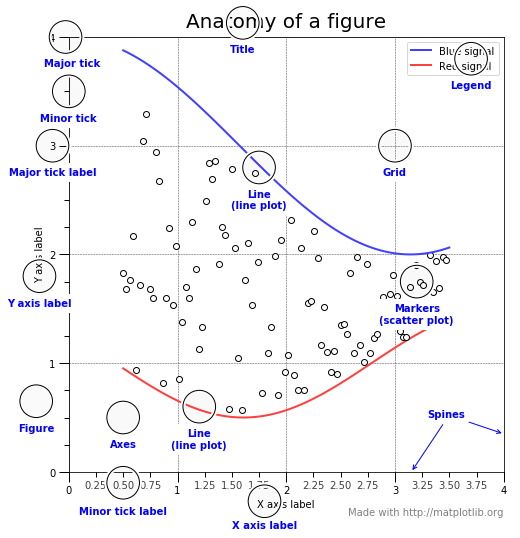

In [25]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

Now it's your turn to experiment! 

For more about matplotlib, check out the [full documentation](http://matplotlib.org).